In [1]:
import Models.SIRD as sird
import Models.SIRD_Time as sird_time
import Models.SIRD_Beta_Time as sird_beta

import Models.SAIRD as saird
import Models.SAIRD_Time as saird_time

import Models.SAIRD_Feedback as saird_fb

import Models.SIRD_Feedback as sird_fb

import Models.SIRD_Feedback_Delay as sird_fd

import Models.SIRD_Feedback_Delay

import Models.process as process

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [121]:
pathc = "../Data/Italian Data/"
#pathc="../Data/Covid Tracking State Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
#filename = "CA.csv"
dates, infectRaw, recovRaw, deadRaw = process.loadData(pathc + filename)

#recovRaw = process.getRecov(infectRaw, deadRaw)
#infectRaw = process.getCurrentInfect(infectRaw, recovRaw, deadRaw)

pop = 60000000

skipDays = 0
numDays = 160 #len(infectRaw) - 28 #just to get initial beginning data
#asympt = asymptRaw[skipDays:numDays]
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

daysToPredict = 110

## SIRD Feedback with delay

In [49]:
sird.weightDecay= .97
sird.regularizer=10

sird_fd.weightDecay = .97 #very small amount of decay
sird_fd.regularizer = 10
sird_fd.betaUseDecay = True

sird_fd.delay = 28

In [69]:
q = sird.getQ(infect,recov, dead, pop) #use non feedback model to get q value, should be accurate enough
print("q =", q)

#q=.011
suscept = process.getSuscept(infect,recov,dead, q,pop)

q = 0.2431392053333333


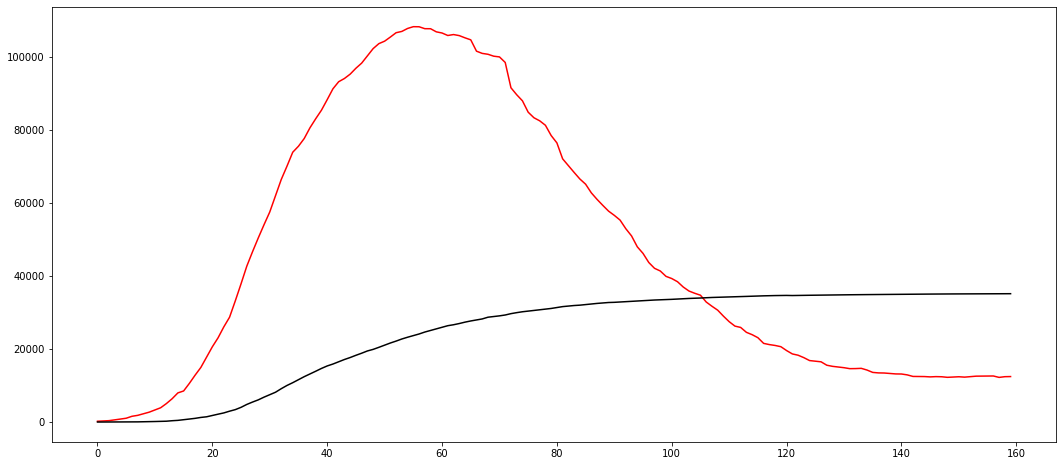

In [70]:
fig,ax = sird_fd.displayData(suscept, infect, recov, dead, graphVals=[0,1,0,1])

In [71]:
b1Range = (0, 5000)
b2Range = (0, 5)

betaVarsResol = [100, 15]

linVars, nonLinVars = sird_fd.solveAllVars(suscept, infect, recov, dead, [b1Range, b2Range], betaVarsResol, printOut=True)

Solution: 
b0:  -0.045199770393630434
b1:  0.1944385623499457
g:   0.030023497085678866
nu:  0.0031256514527479747
b2:  2350.0
b3:  0.3333333333333333
cost:  130317.84547641753



In [72]:
sirdLinVars = sird.getLinVars(suscept, infect, recov, dead)

print("cost: ", sird.getError(suscept, infect, recov, dead, sirdLinVars))

cost:  264540.0079023279


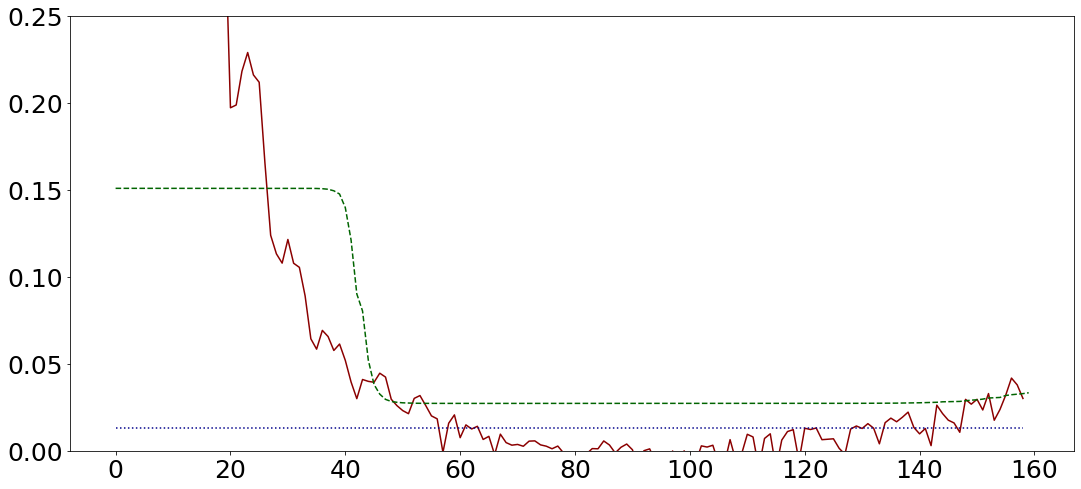

In [120]:
betaTime = sird_fd.getBetaTime(suscept, infect, recov, dead, linVars, nonLinVars)
linVarsTime = sird_time.getLinVars(suscept, infect, recov, dead)
linVarsConst = sird.getLinVars(suscept, infect, recov, dead)


fig, ax = plt.subplots(figsize=(18,8))
ax.plot(linVarsTime[:,0], color="darkred") #time varying beta
ax.plot(np.ones(len(linVarsTime[:,0]))*linVarsConst[0], color="darkblue", linestyle="dotted") #constant beta
ax.plot(betaTime, color="darkgreen", linestyle="dashed") #feedback beta
ax.set_ylim([0,.25])

ax.tick_params(axis="both", labelsize=25)

Lin Vars: [0.019896373662388212, 0.030023497085678866, 0.0031256514527479747]
Non Lin Vars: [2350.0, 0.3333333333333333]
Lin Vars: [-0.045199770393630434, 0.1944385623499457, 0.030023497085678866, 0.0031256514527479747]
Lin Vars: [0.22981733512747182, 0.02321733077466573, 0.016839658587661427]


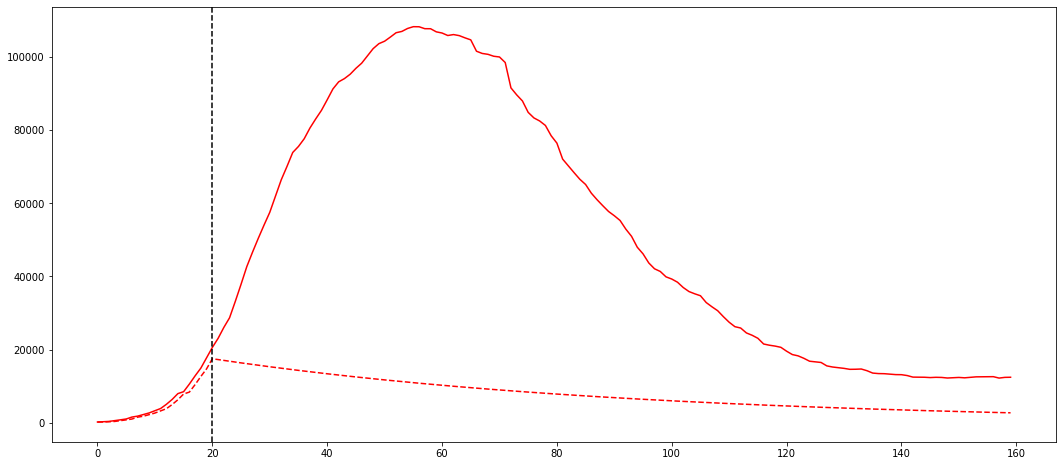

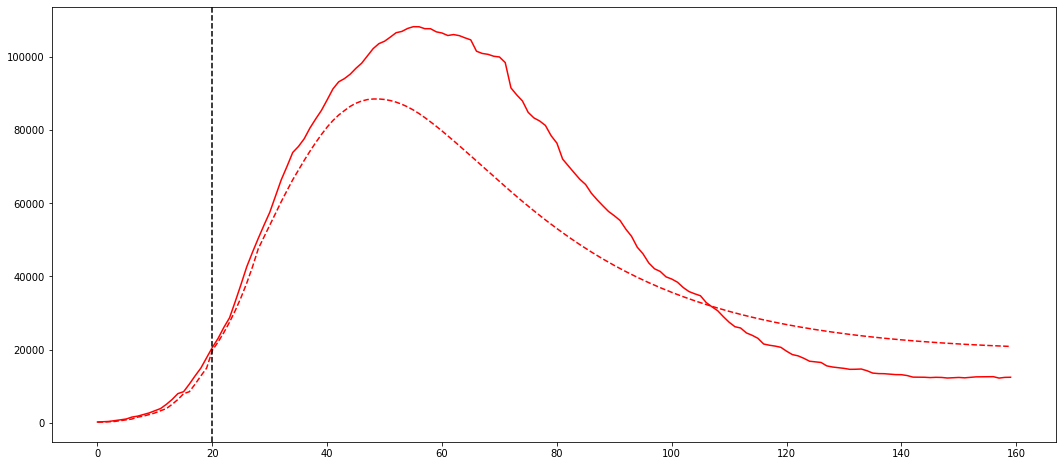

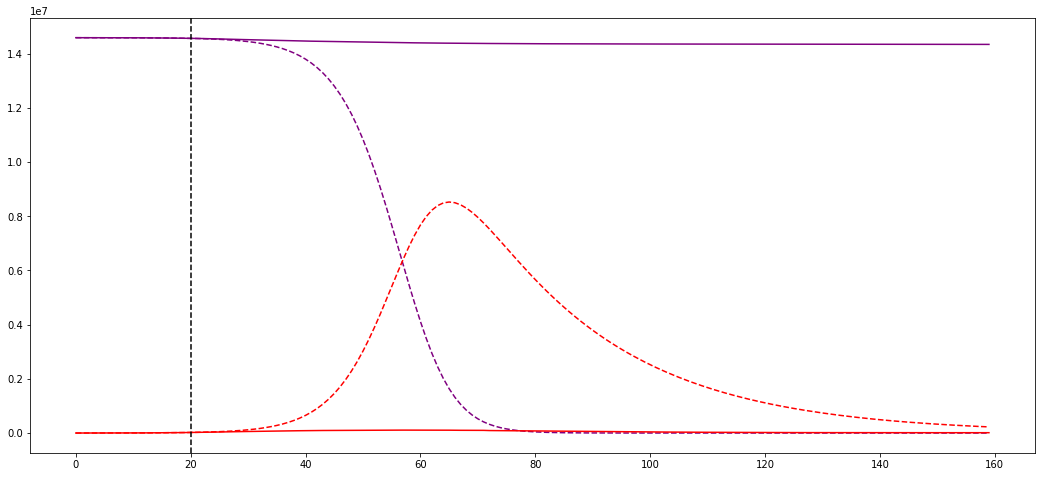

In [75]:
dTP= len(suscept) - 20


sird.predictMatch(suscept, infect, recov, dead, dTP, linVars=linVarsConst, graphVals=[0,1,0,0]);
sird_fd.predictMatch(suscept, infect, recov, dead, dTP, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,0,0]);
sird.predictMatch(suscept, infect, recov, dead, dTP, graphVals=[1,1,0,0]);

Lin Vars: [0.054835200563775256, 0.016760191205109375, 0.007916273690943772]
Non Lin Vars: [1550.0, 0.3333333333333333]
Lin Vars: [-0.04551824535143164, 0.1947966309172764, 0.030023497085678866, 0.0031256514527479747]
Non Lin Vars: [5000.0, 1.0]
Lin Vars: [0.02571288403532806, 0.09086213771153136, 0.016760191205109375, 0.007916273690943772]


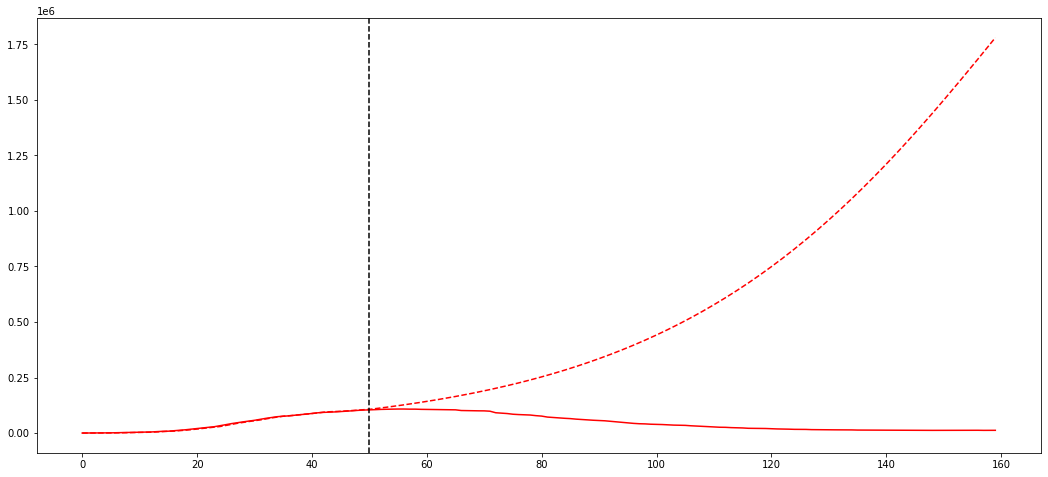

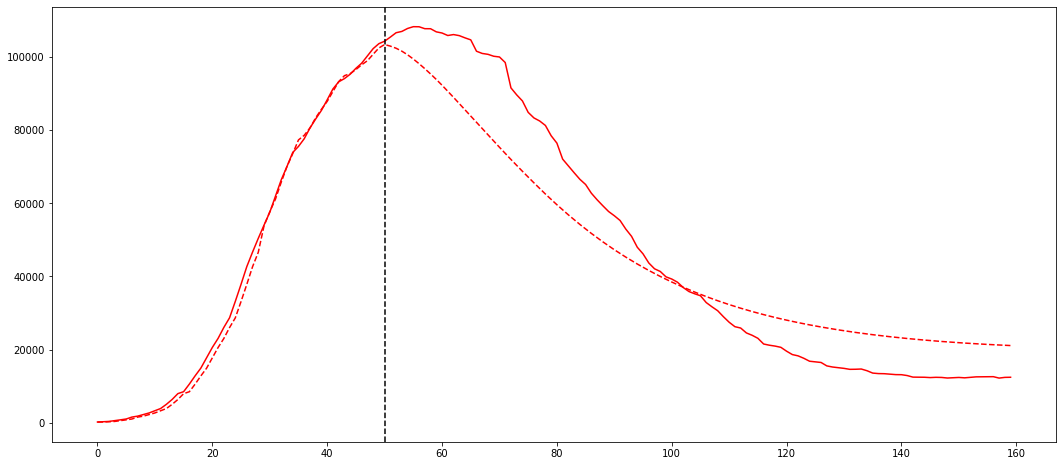

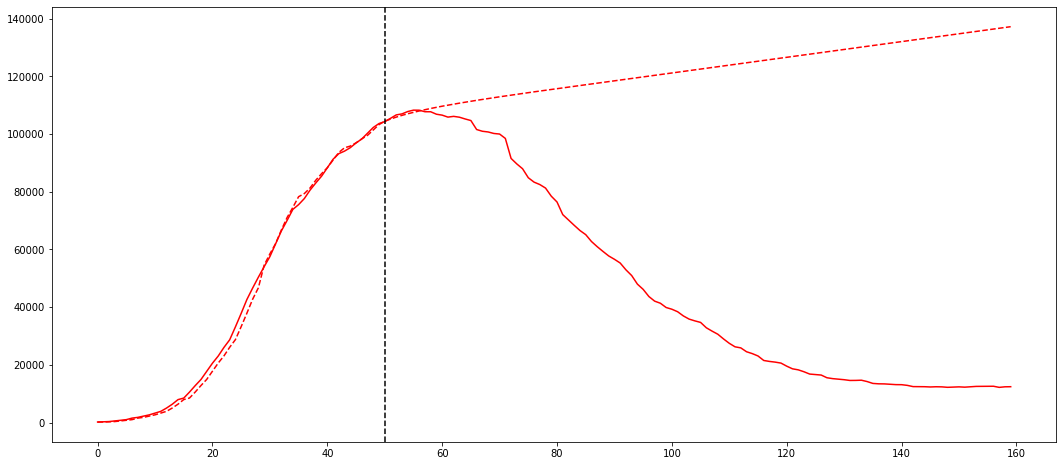

In [10]:
#daysToPredict = 180
sird.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);

#note using the nonLinVars is trained on the whole data includinig the predicted days
sird_fd.predictMatch(suscept, infect, recov, dead, daysToPredict, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,0,0]);

#only train nonLinVars on the non predicted days only
sp,ip,rp,dp, fig, ax = sird_fd.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);

## SAIRD Version

In [88]:
saird.weightDecay= .9
saird.regularizer=10

saird_fb.weightDecay = .97 #very small amount of decay
saird_fb.regularizer = 10
saird_fb.betaUseDecay = False

asymptDelay = 14

In [89]:
asymptRaw = saird.getAsympt(infectRaw, recovRaw, deadRaw, shift=asymptDelay)

asympt = asymptRaw[skipDays:numDays]

In [90]:
q = saird.getQ(asympt, infect, recov, dead, pop) #use non feedback model to get q value, should be accurate enough
print("q =", q)

#q=.011
suscept = saird.getSuscept(asympt, infect,recov,dead, q,pop)

q = 0.2431392053333333


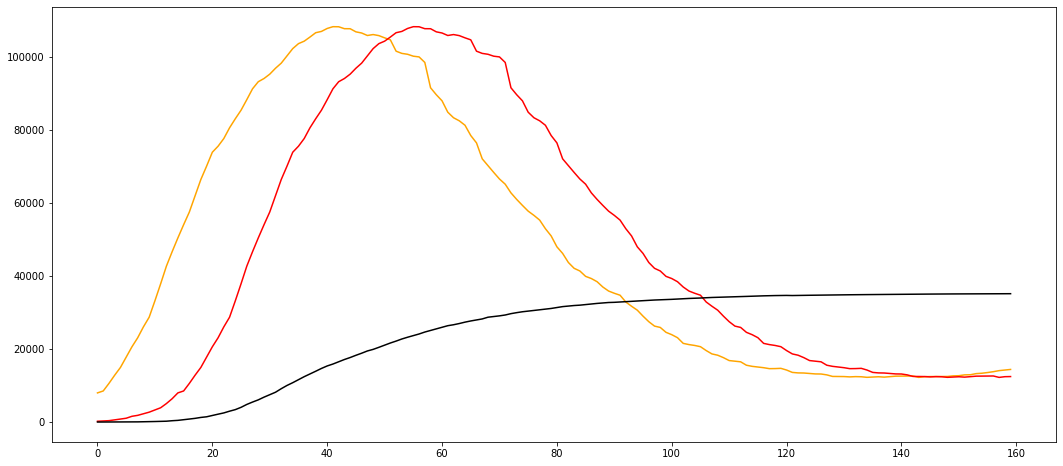

In [91]:
fig,ax = saird_fb.displayData(suscept, asympt, infect, recov, dead, graphVals=[0,1,1,0,1])

In [92]:
b1Range = (0, 5000)
b2Range = (0, 5)

betaVarsResol = [100, 15]

linVars, nonLinVars = saird_fb.solveAllVars(suscept, asympt, infect, recov, dead, [b1Range, b2Range], betaVarsResol, printOut=True)

Solution: 
b0:  0.02724192037919502
b1:  0.12364291630262517
k:   0.026231132328385563
g:   0.030023497085678866
nu:  0.0031256514527479747
b2:  1800.0
b3:  4.999999999999999
cost:  452769.8541626022



In [93]:
sairdLinVars = saird.getLinVars(suscept, asympt, infect, recov, dead)

print("cost: ", saird.getError(suscept, asympt, infect, recov, dead, sairdLinVars))

cost:  11398.982132421925


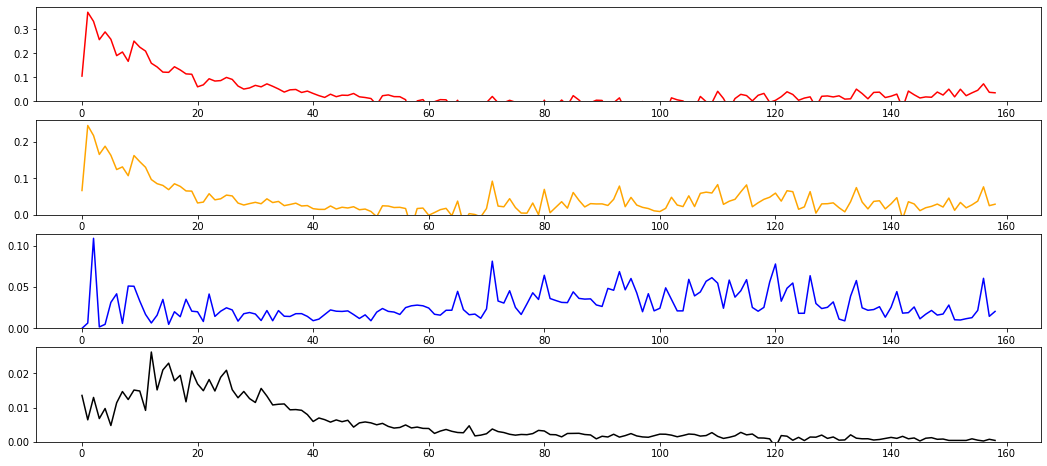

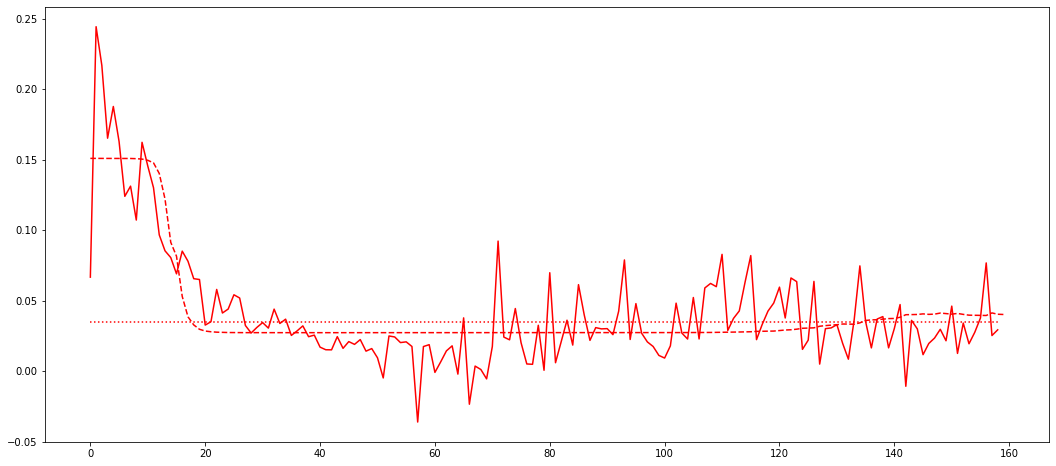

In [94]:
betaTime = saird_fb.getBetaTime(suscept, asympt, infect, recov, dead, linVars, nonLinVars)
linVarsTime, fig2, ax2 = saird_time.getLinVars(suscept, asympt, infect, recov, dead, graph=True)
linVarsConst = saird.getLinVars(suscept, asympt, infect, recov, dead)


fig, ax = plt.subplots(figsize=(18,8))
ax.plot(np.ones(len(linVarsTime[:,0]))*linVarsConst[0], color="red", linestyle="dotted") #constant beta
ax.plot(betaTime, color="red", linestyle="dashed") #feedback beta
ax.plot(linVarsTime[:,0], color="red") #time varying beta
#ax.plot(linVarsTime[:,1], color="orange") #compare with kappa

Lin Vars: [0.03469319502555621, 0.033264918009217145, 0.02470895505824874, 0.0007978657633780109]
Non Lin Vars: [1800.0, 4.999999999999999]
Lin Vars: [0.02724192037919502, 0.12364291630262517, 0.026231132328385563, 0.030023497085678866, 0.0031256514527479747]


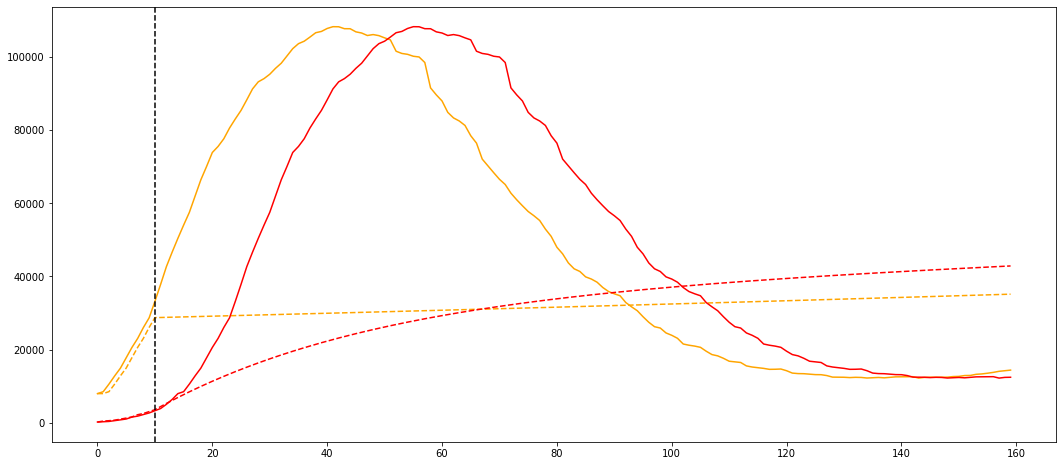

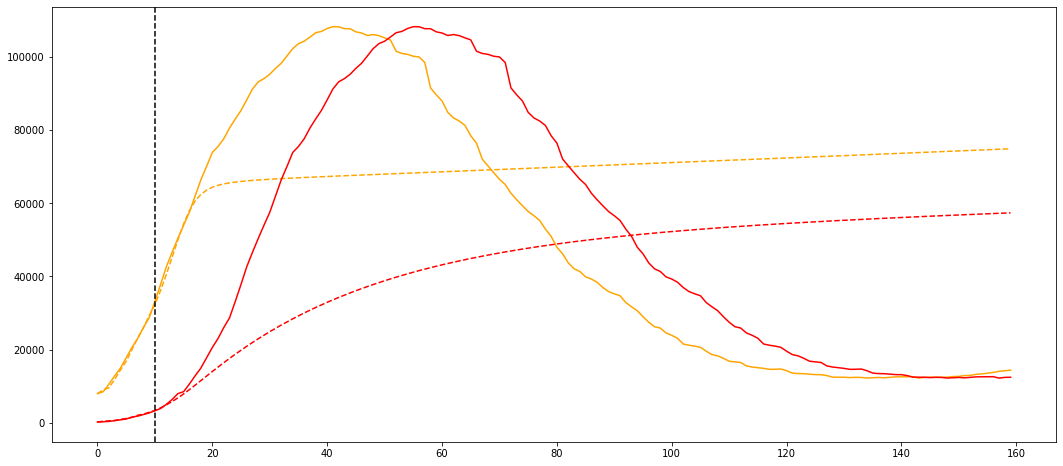

In [97]:
dTP= len(suscept) - 10


saird.predictMatch(suscept, asympt, infect, recov, dead, dTP, linVars=linVarsConst, graphVals=[0,1,1,0,0]);
saird_fb.predictMatch(suscept, asympt, infect, recov, dead, dTP, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,1,0,0]);

Lin Vars: [0.03544794866101424, 0.022980229133589766, 0.016850902743082576, 0.006837368520087293]
Non Lin Vars: [1800.0, 4.999999999999999]
Lin Vars: [0.02724192037919502, 0.12364291630262517, 0.026231132328385563, 0.030023497085678866, 0.0031256514527479747]
Non Lin Vars: [100.0, 1.0]
Lin Vars: [-0.08822455960582132, 0.1971974408501807, 0.029300245453939902, 0.016760191205109375, 0.007916273690943772]


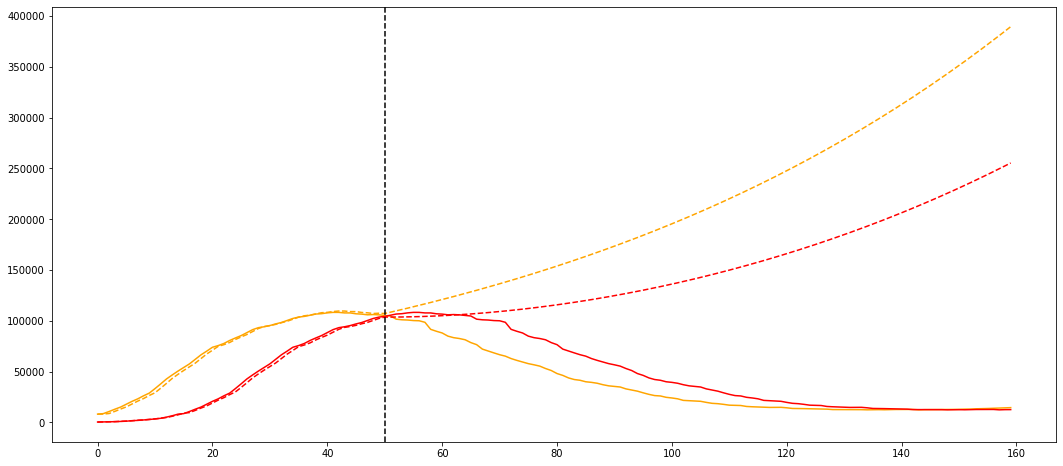

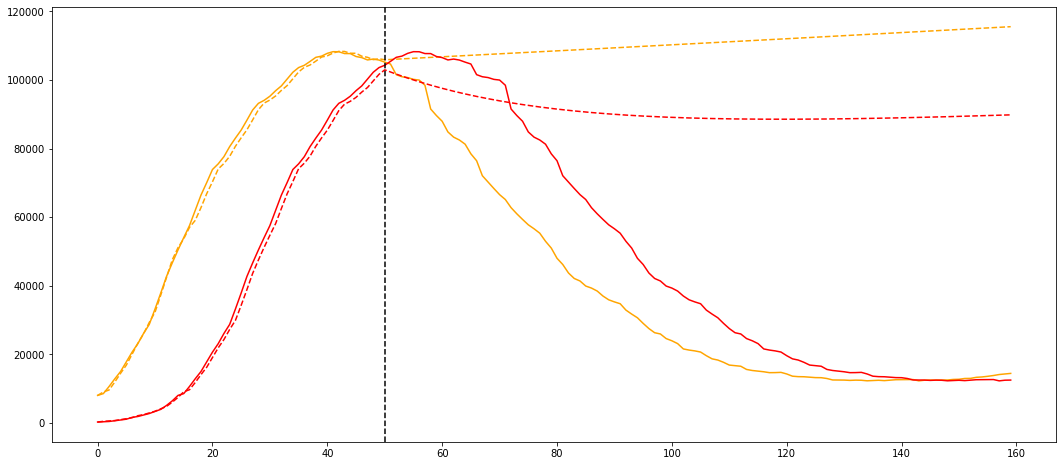

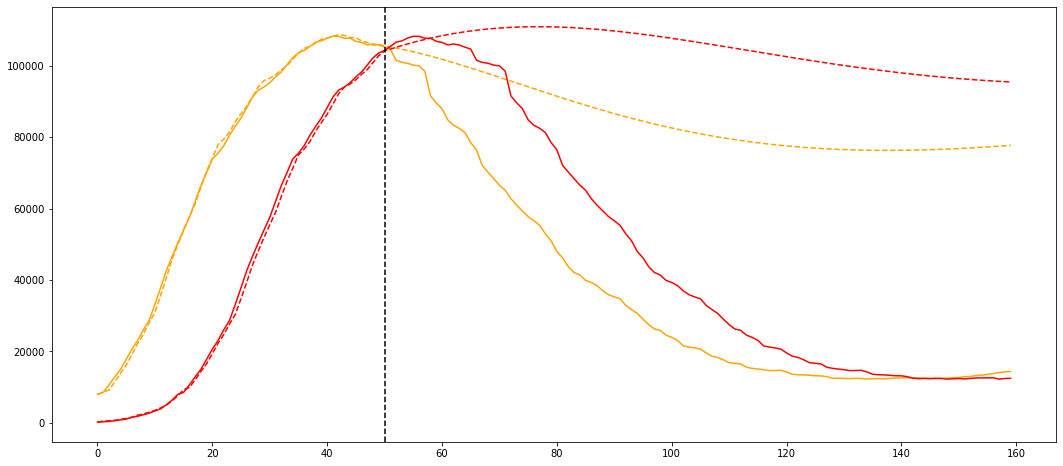

In [96]:
#daysToPredict = 180
saird.predictMatch(suscept, asympt, infect, recov, dead, daysToPredict, graphVals=[0,1,1,0,0]);

#note using the nonLinVars is trained on the whole data includinig the predicted days
saird_fb.predictMatch(suscept, asympt, infect, recov, dead, daysToPredict, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,1,0,0]);

#only train nonLinVars on the non predicted days only
saird_fb.predictMatch(suscept, asympt, infect, recov, dead, daysToPredict, graphVals=[0,1,1,0,0]);

In [11]:
def getFitError(I, IP):
    return sum((I - IP)**2) #squared error

In [81]:
print(linVarsConst)
linVarsConst2 = sird.getLinVars(suscept[0:50], infect[0:50], recov[0:50], dead[0:50])

[0.019896373662388212, 0.030023497085678866, 0.0031256514527479747]


Lin Vars: [0.05466053806532889, 0.016760191205109375, 0.007916273690943772]
Non Lin Vars: [2350.0, 0.3333333333333333]
Lin Vars: [-0.045199770393630434, 0.1944385623499457, 0.030023497085678866, 0.0031256514527479747]


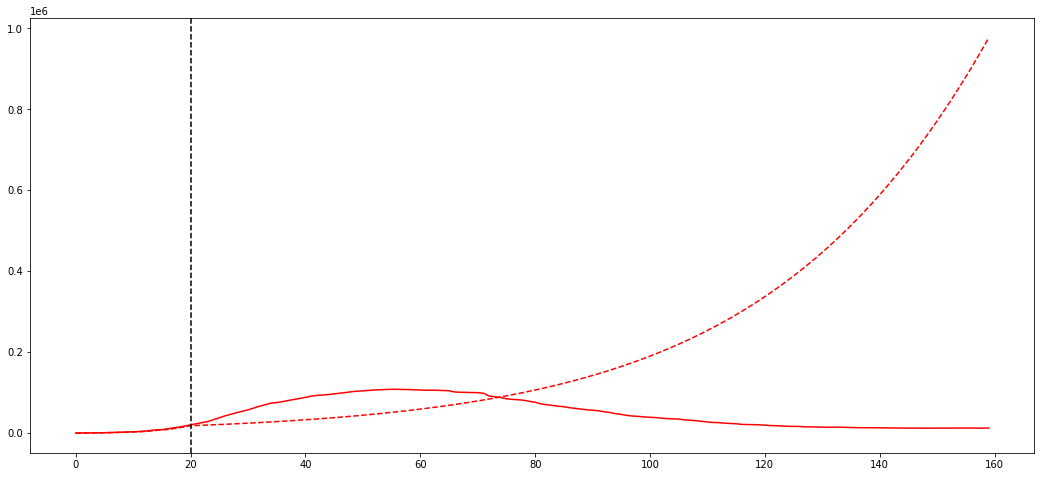

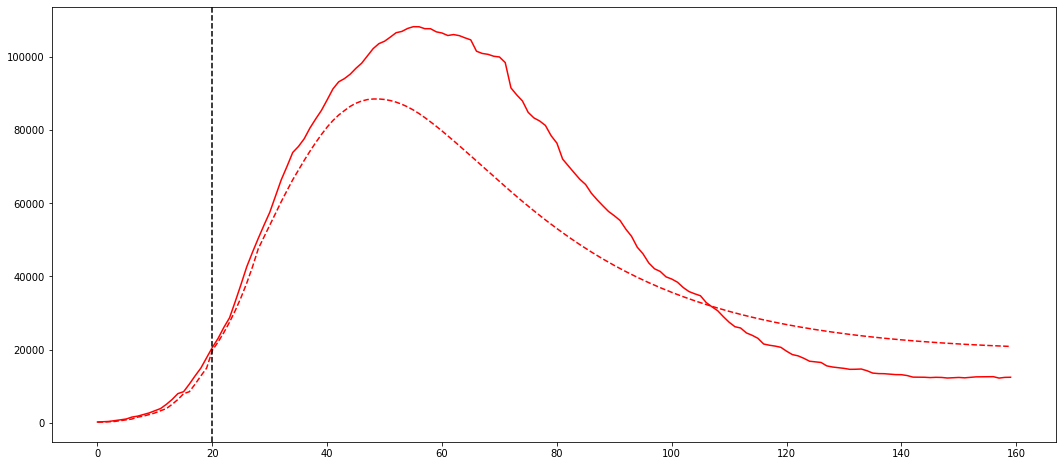

In [82]:
dTP= len(suscept) - 20

#linVarsConst = sird.getLinVars(suscept[:len(infect)-dTP], infect[:len(infect)-dTP], recov[:len(infect)-dTP], dead[:len(infect)-dTP])

sird.predictMatch(suscept, infect, recov, dead, dTP, linVars=linVarsConst2, graphVals=[0,1,0,0]);
sird_fd.predictMatch(suscept, infect, recov, dead, dTP, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,0,0]);

Lin Vars: [0.05466053806532889, 0.016760191205109375, 0.007916273690943772]
1 580442214886.8904
Lin Vars: [0.05466053806532889, 0.016760191205109375, 0.007916273690943772]
2 1014686492973.5897
Lin Vars: [0.05466053806532889, 0.016760191205109375, 0.007916273690943772]
3 1836494437520.9966
Lin Vars: [0.05466053806532889, 0.016760191205109375, 0.007916273690943772]
4 3025599796692.208
Lin Vars: [0.05466053806532889, 0.016760191205109375, 0.007916273690943772]
5 4562735042910.31
Lin Vars: [0.05466053806532889, 0.016760191205109375, 0.007916273690943772]
6 6429579030965.932
Lin Vars: [0.05466053806532889, 0.016760191205109375, 0.007916273690943772]
7 8608707639210.693
Lin Vars: [0.05466053806532889, 0.016760191205109375, 0.007916273690943772]
8 11083547208619.688
Lin Vars: [0.05466053806532889, 0.016760191205109375, 0.007916273690943772]
9 13838330606987.951


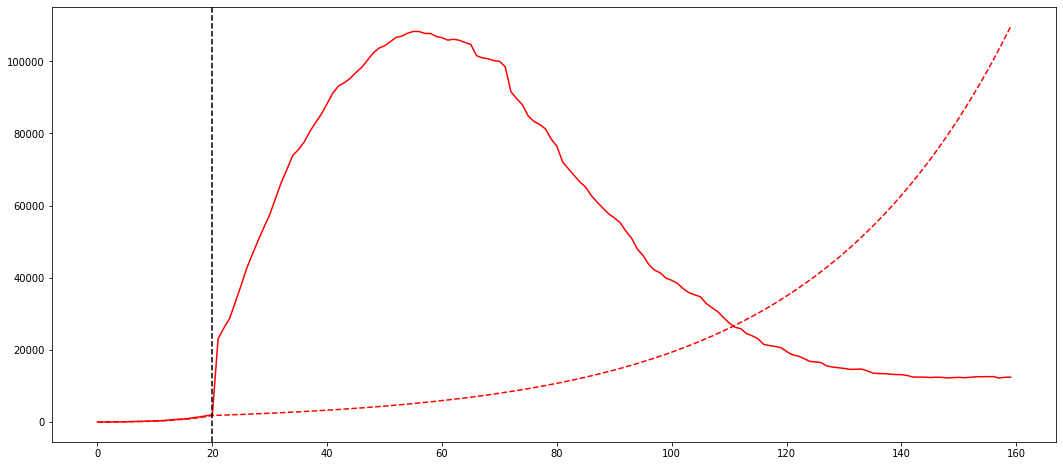

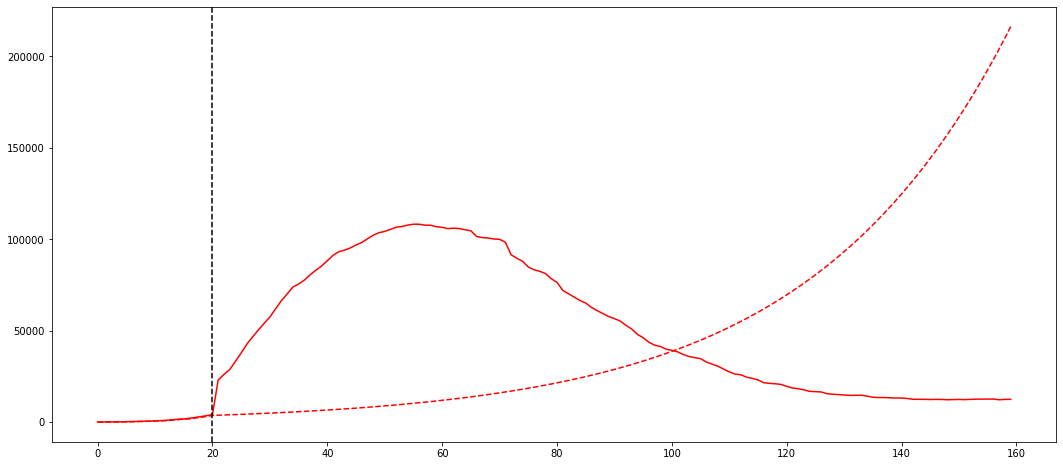

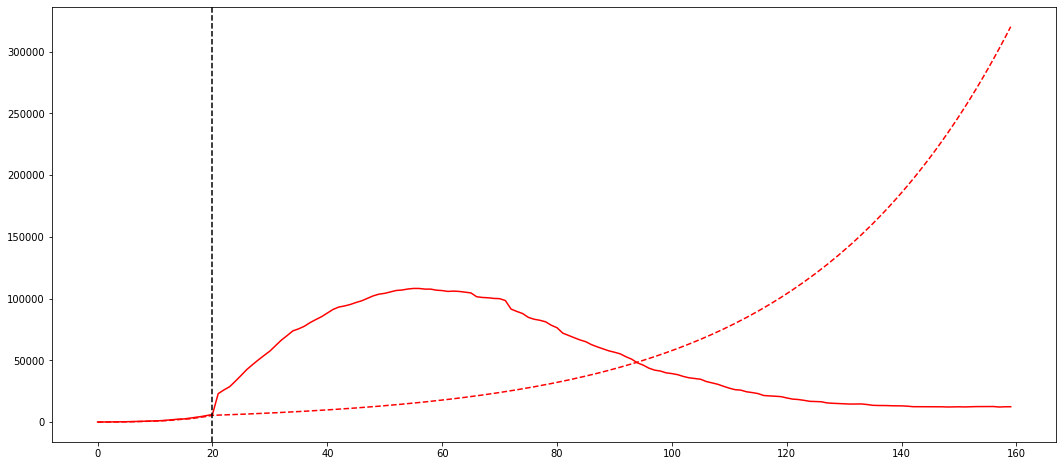

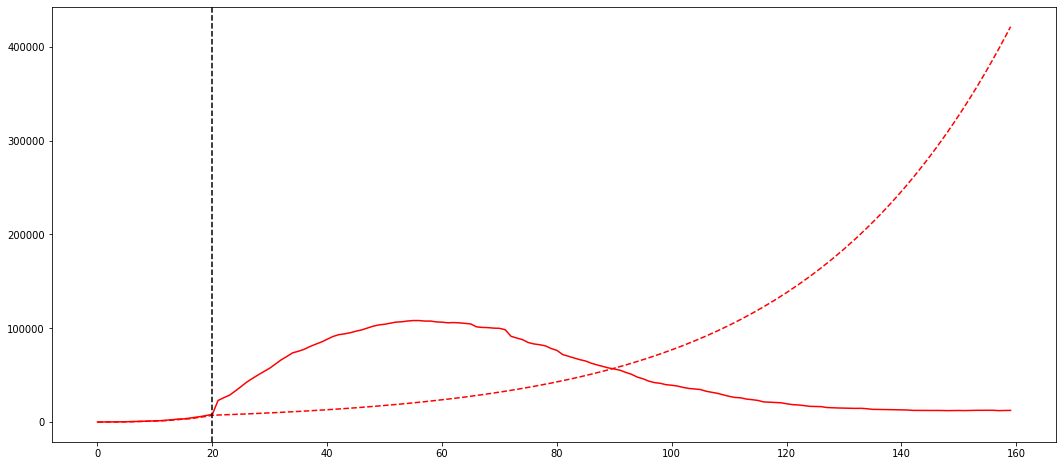

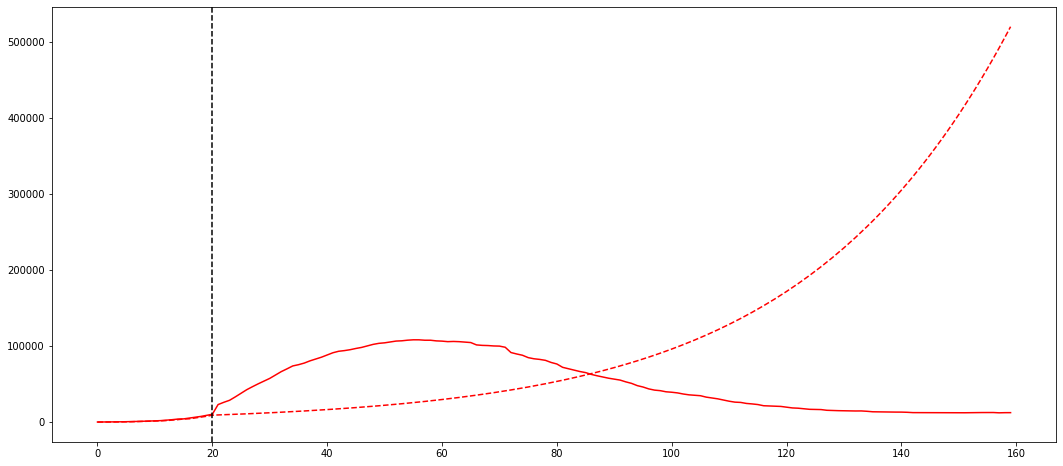

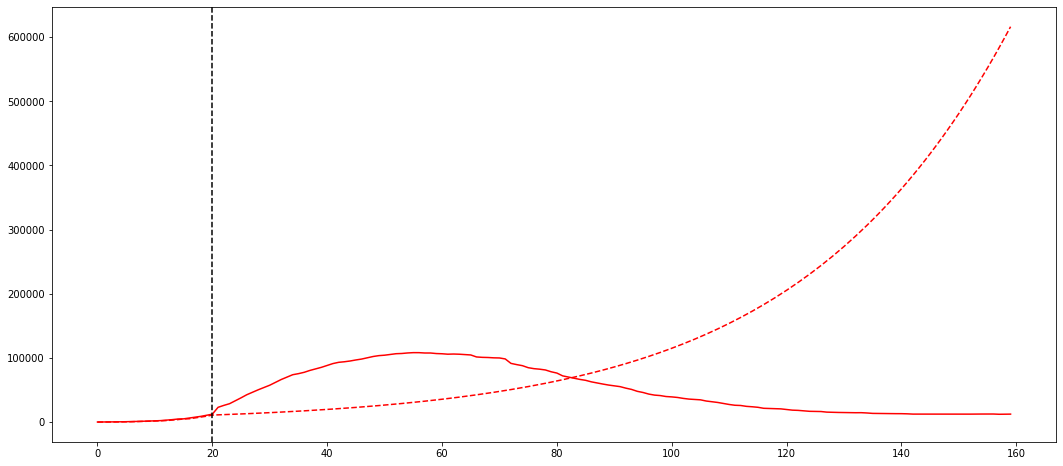

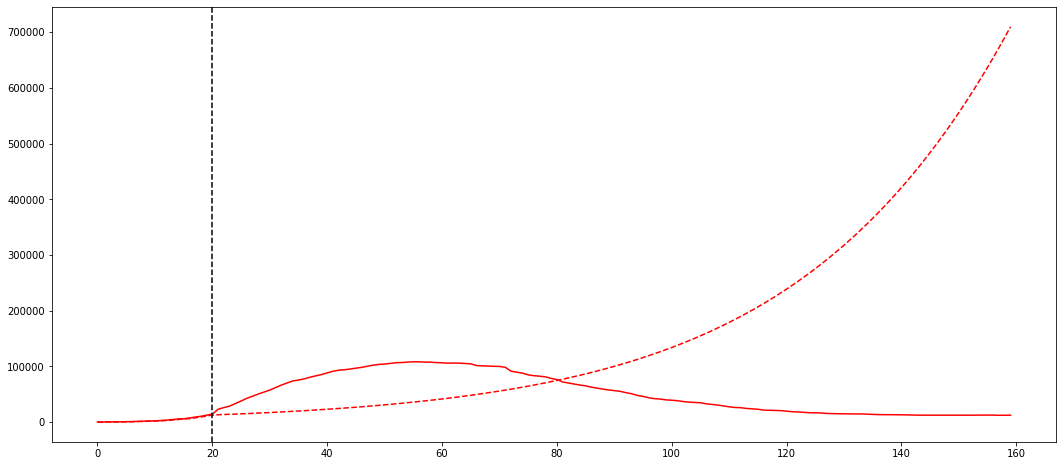

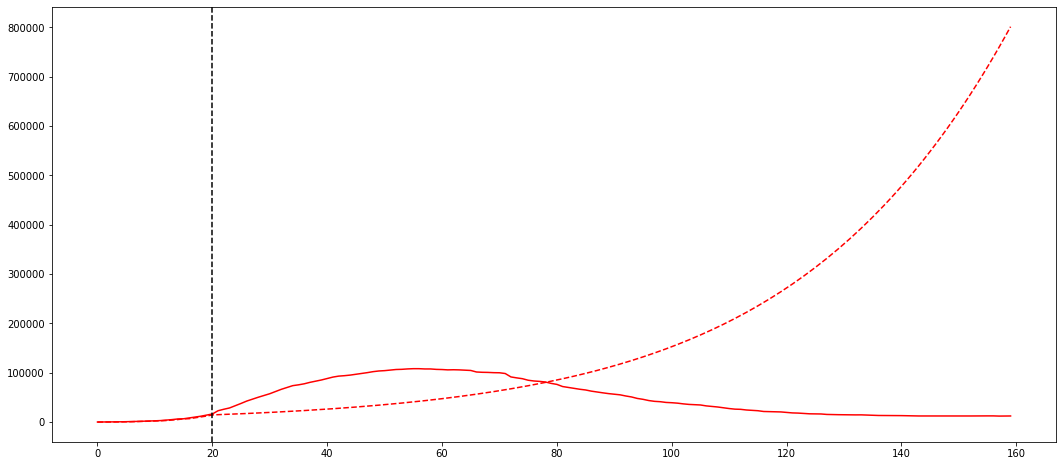

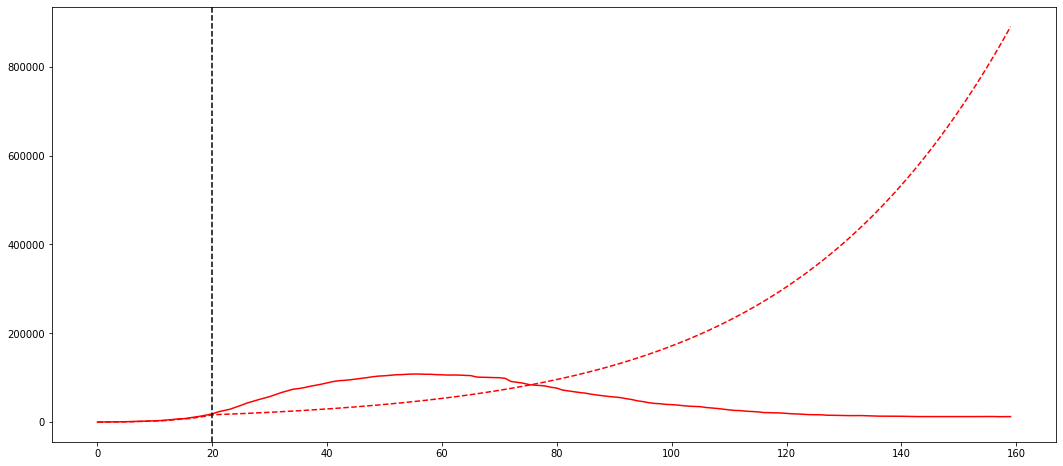

In [86]:
for i in range(1,10):
    infectTest = infect.copy()
    infectTest[0:len(suscept)-dTP+1] = infectTest[0:len(suscept)-dTP+1] *i / 10
    sp,ip,rp,dp, fig, ax = sird.predictMatch(suscept, infectTest, recov, dead, dTP, linVars=linVarsConst2, graphVals=[0,1,0,0])
    
    print(i, getFitError(infect, ip))

Non Lin Vars: [1550.0, 0.3333333333333333]
Lin Vars: [-0.04551824535143164, 0.1947966309172764, 0.030023497085678866, 0.0031256514527479747]
1 183282692533.5303
Non Lin Vars: [1550.0, 0.3333333333333333]
Lin Vars: [-0.04551824535143164, 0.1947966309172764, 0.030023497085678866, 0.0031256514527479747]
2 79076064924.31824
Non Lin Vars: [1550.0, 0.3333333333333333]
Lin Vars: [-0.04551824535143164, 0.1947966309172764, 0.030023497085678866, 0.0031256514527479747]
3 40598593322.44178
Non Lin Vars: [1550.0, 0.3333333333333333]
Lin Vars: [-0.04551824535143164, 0.1947966309172764, 0.030023497085678866, 0.0031256514527479747]
4 33028611713.7796
Non Lin Vars: [1550.0, 0.3333333333333333]
Lin Vars: [-0.04551824535143164, 0.1947966309172764, 0.030023497085678866, 0.0031256514527479747]
5 35173088534.30352
Non Lin Vars: [1550.0, 0.3333333333333333]
Lin Vars: [-0.04551824535143164, 0.1947966309172764, 0.030023497085678866, 0.0031256514527479747]
6 33680272851.601246
Non Lin Vars: [1550.0, 0.333333333

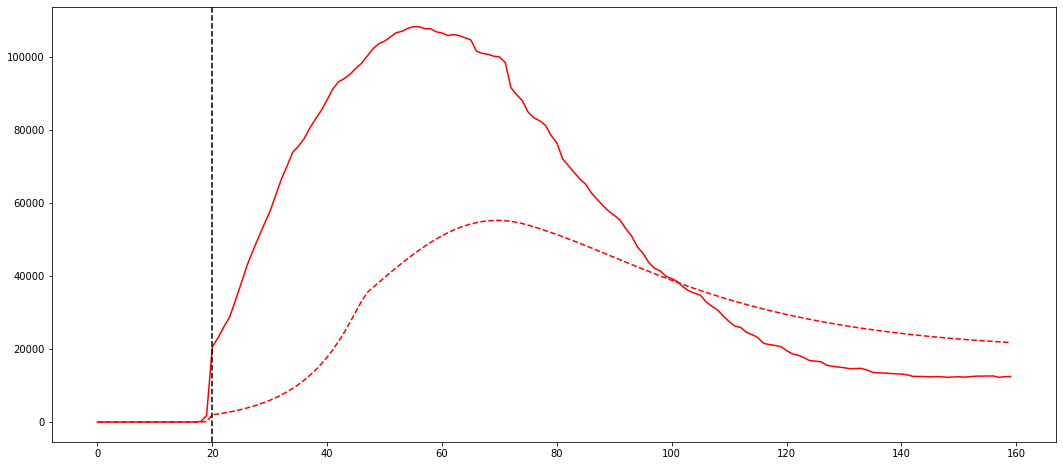

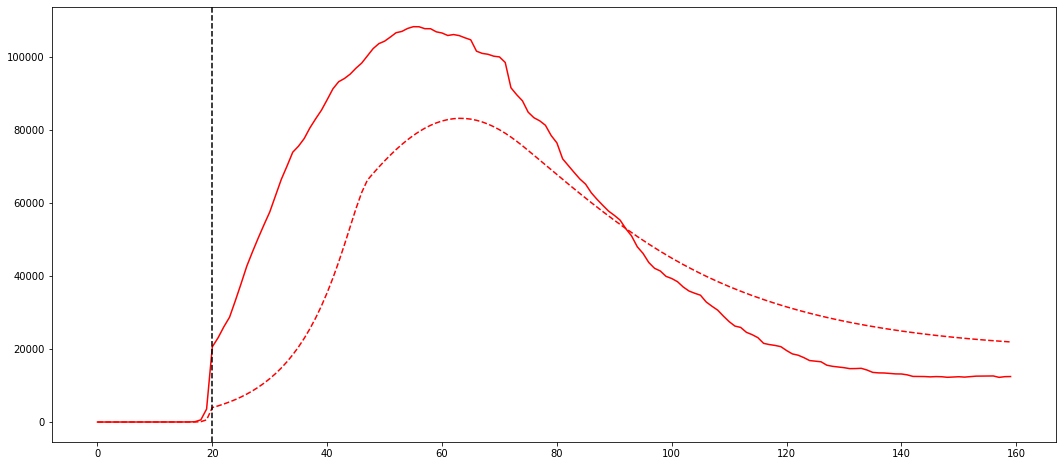

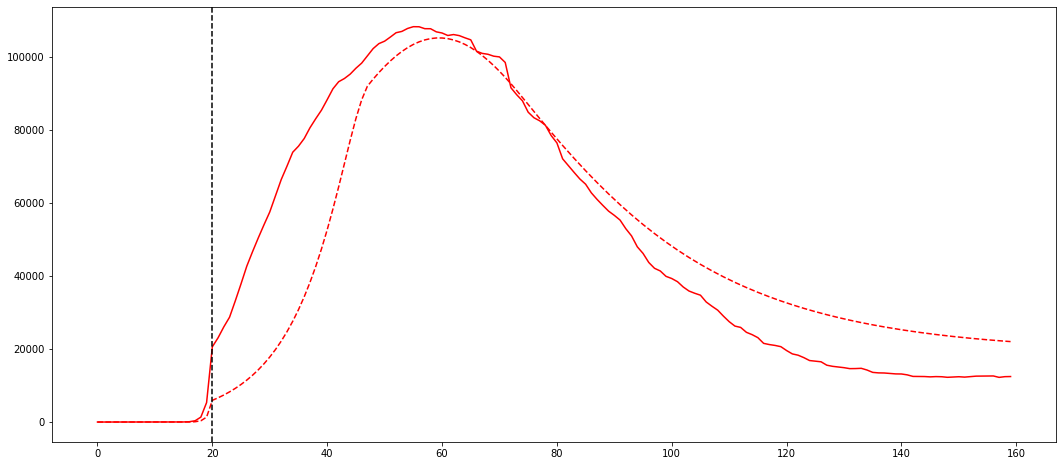

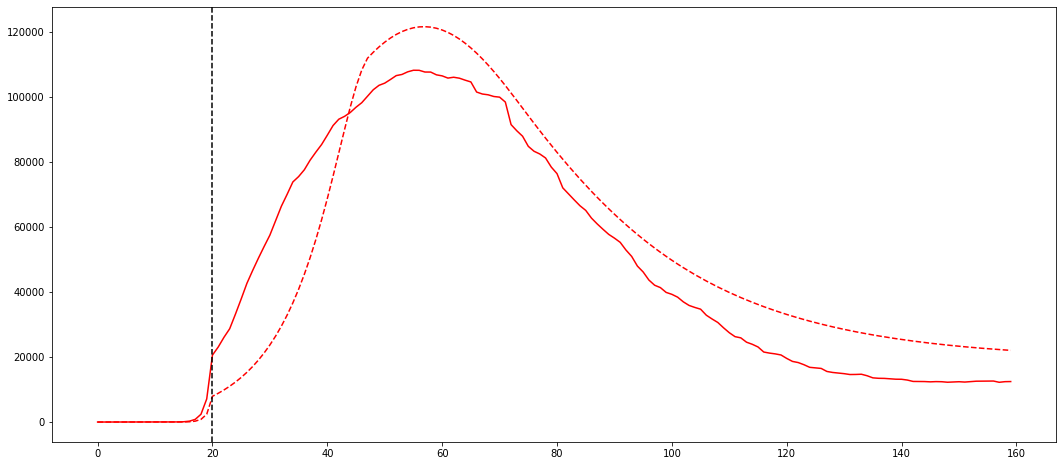

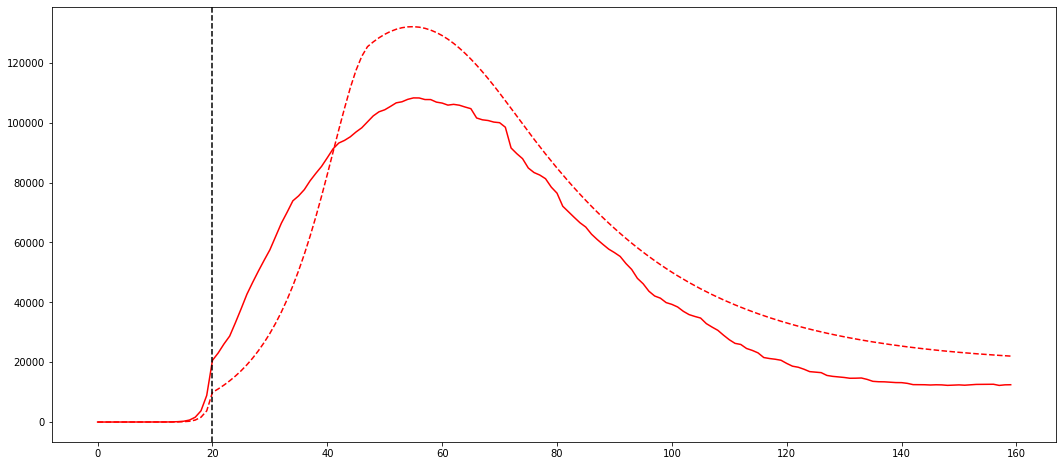

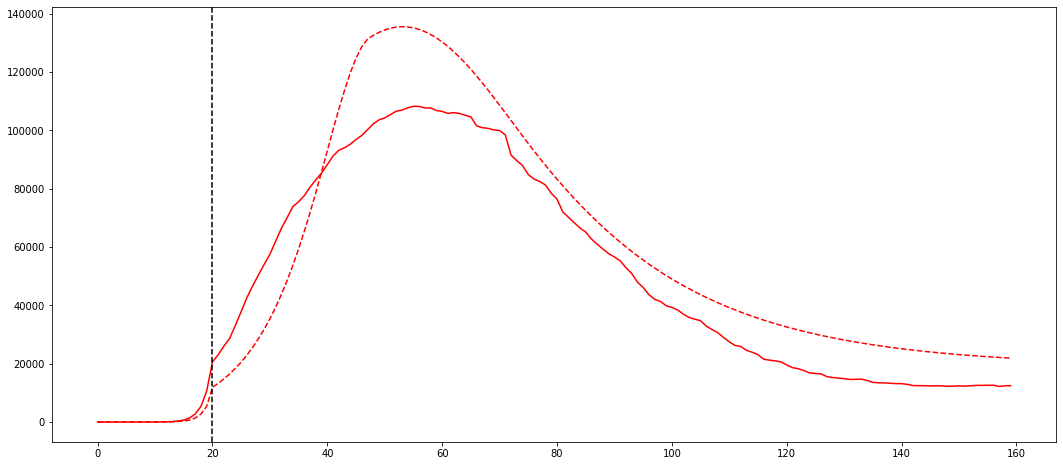

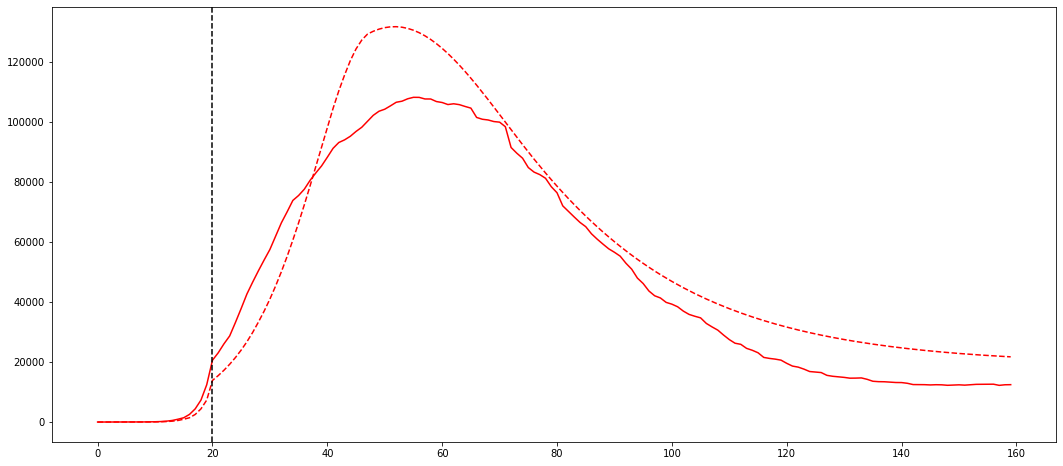

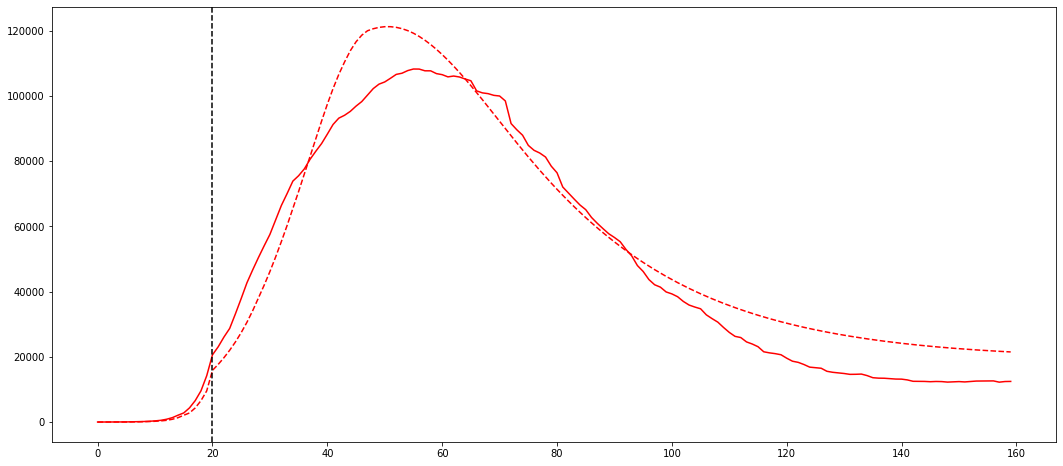

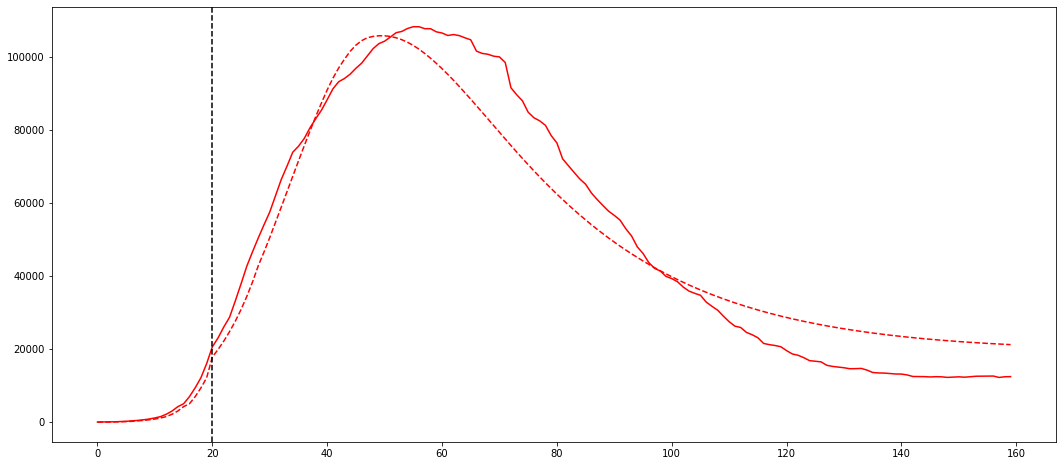

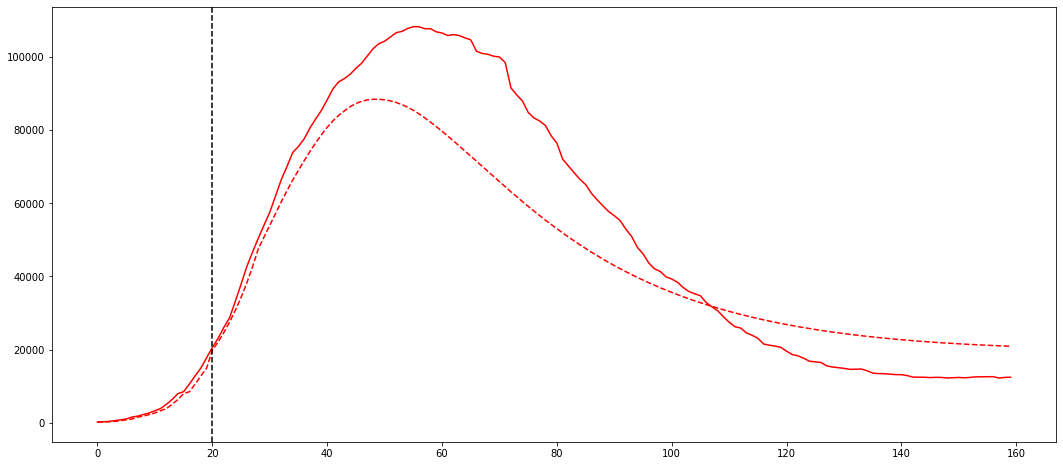

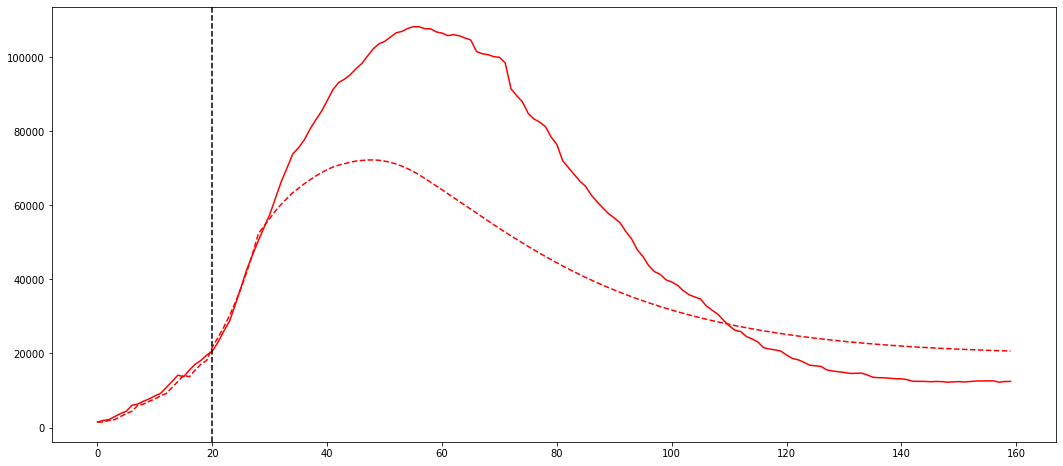

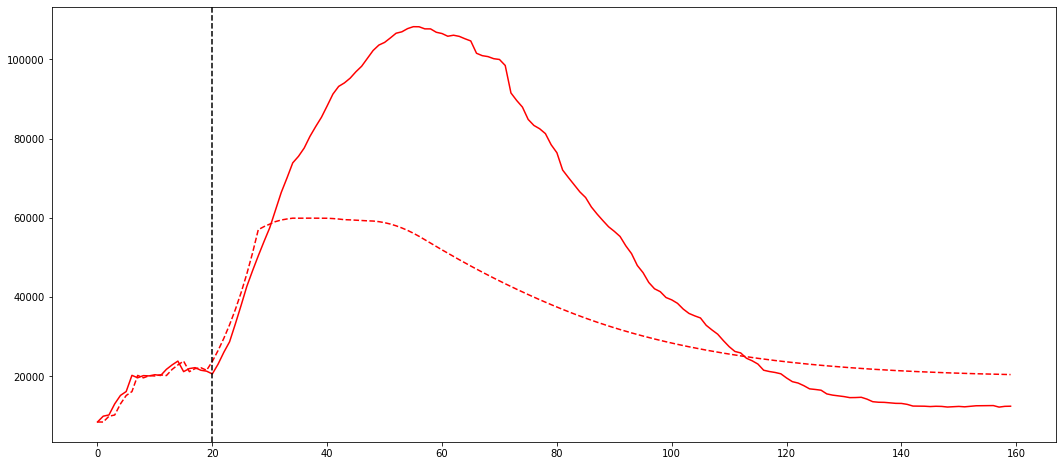

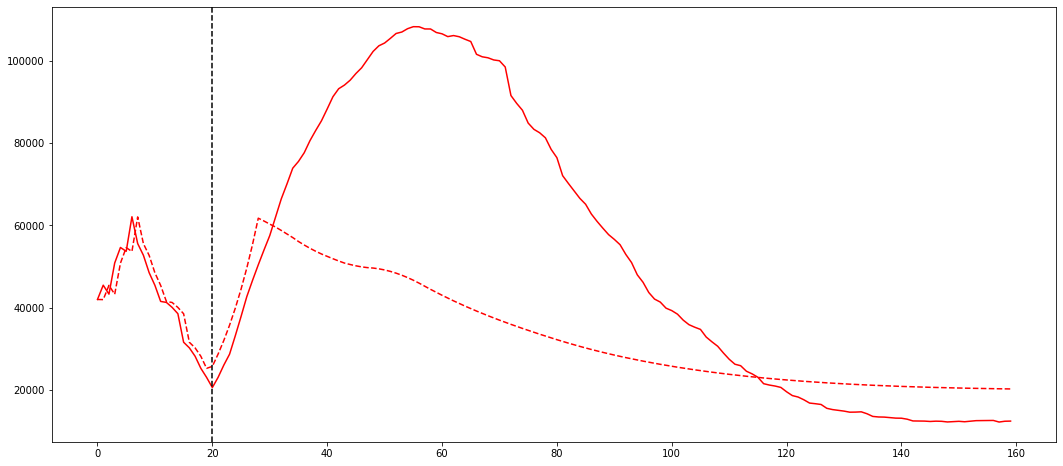

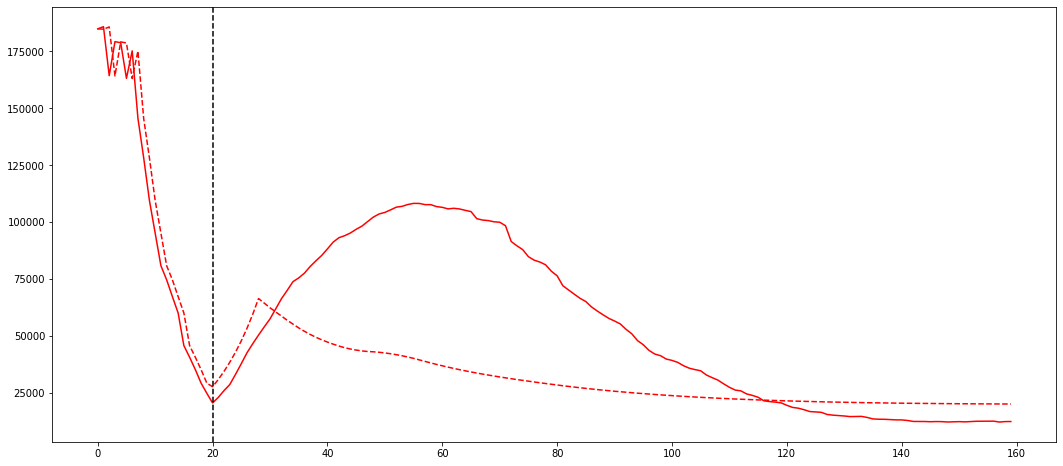

In [65]:
minError = 1e100 #let this be an enormous error
minVal = 0

for i in range(1,15):
    infectTest = infect.copy()
    for j in range(0,len(suscept)-dTP+1):
        infectTest[j] = infectTest[j] * (i/10)**(len(suscept)-dTP - j)
    sp,ip,rp,dp, fig, ax = sird_fd.predictMatch(suscept, infectTest, recov, dead, dTP, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,0,0])
    
    currError = getFitError(infect, ip)
    
    if(currError < minError):
        minError = currError
        minVal = i
    
    print(i, getFitError(infect, ip))
    
print("min: ", minVal, minError)

Non Lin Vars: [1550.0, 0.3333333333333333]
Lin Vars: [-0.04551824535143164, 0.1947966309172764, 0.030023497085678866, 0.0031256514527479747]


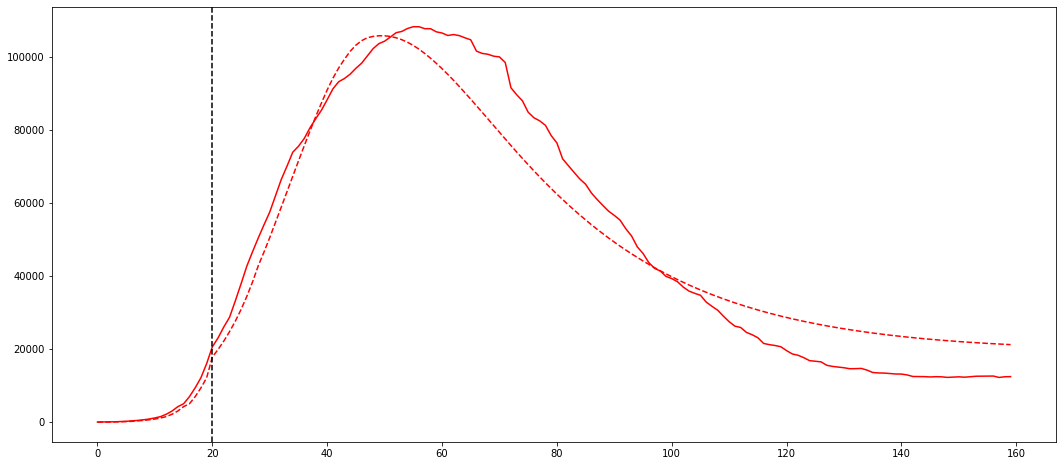

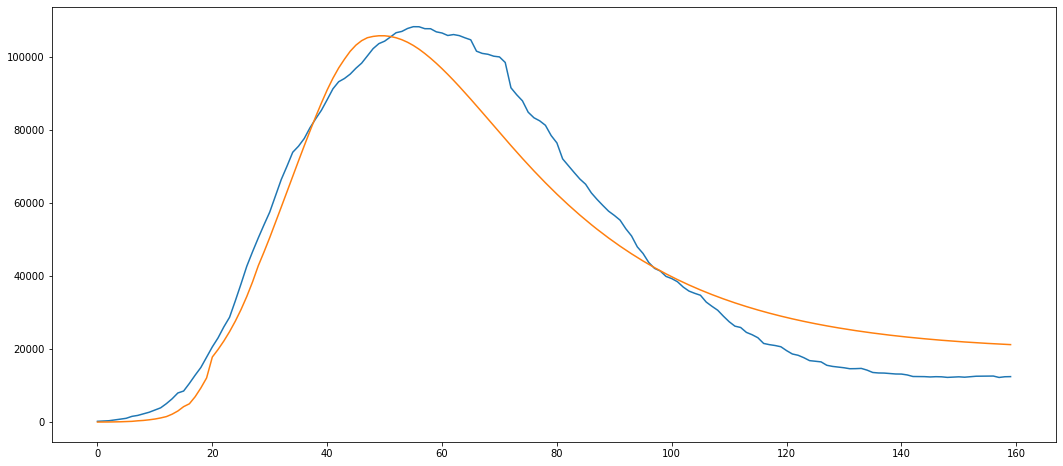

In [67]:
for j in range(0,len(suscept)-dTP+1):
    infectTest[j] = infect[j] * (minVal/10)**(len(suscept)-dTP - j)
sp,ip,rp,dp, fig, ax = sird_fd.predictMatch(suscept, infectTest, recov, dead, dTP, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,0,0])

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(infect)
ax.plot(ip)